In [98]:
import random
import time

data = {}

def sudoku():
    for i in range(100):
        try:
            for i in range(81):
                data[i]={'index':i,
                         'col':i%9,
                         'row':i//9,
                         'value':0,
                         'box':i//3 - 3*(i//9 - (i//9)//3),
                         'pos':[1,2,3,4,5,6,7,8,9],
                         'state':'ready'}


            def removeOther(r,c,b,n):
                for i in range(81):
                    if (len(data[i]['pos']) > 0) and (n in data[i]['pos']):
                        if(data[i]['row']==r) or (data[i]['col']==c) or (data[i]['box']==b):
                            data[i]['pos'].remove(n)

            def check():
                for i in range(81):
                    if (len(data[i]['pos']) < 2) and (len(data[i]['pos']) > 0) and (data[i]['state'] == 'ready'):
                        data[i]['value']=random.choice(data[i]['pos'])
                        data[i]['state']='checked'
                        removeOther(data[i]['row'], data[i]['col'], data[i]['box'], data[i]['value'])


            for i in range(81):
                if data[i]['state'] == 'ready':
                    data[i]['value']=random.choice(data[i]['pos'])
                    data[i]['state']='checked'
                    removeOther(data[i]['row'], data[i]['col'], data[i]['box'], data[i]['value'])
                    check()

            break

        except:
            pass


        
start = time.process_time()
sudoku()
end=(time.process_time() - start)
print(f"\ntime: {end}\n")
    

def draw(text):
    demo=''
    m=0
    for r in range(9):
        for n in range(9):
            m=f"{str(data[n+9*r][text])}"
            if n%3==2 and n%9!=8:
                demo += m+" | "
            else:
                demo += m+" "

        demo += "\n"
        if r%3==2 and r%9!=8:
            demo += "---------------------\n"

    return print(demo)

draw('value')


time: 0.0

8 1 3 | 5 9 6 | 7 2 4 
7 6 2 | 8 3 4 | 9 1 5 
5 9 4 | 7 2 1 | 3 8 6 
---------------------
9 4 1 | 6 5 2 | 8 3 7 
3 2 8 | 9 4 7 | 6 5 1 
6 5 7 | 3 1 8 | 2 4 9 
---------------------
1 7 6 | 4 8 3 | 5 9 2 
2 8 5 | 1 6 9 | 4 7 3 
4 3 9 | 2 7 5 | 1 6 8 



In [65]:
def superCheck():
    print(f"Columns:")
    for i in range(9):
        s=set()
        t=0
        
        for j in range(9):
            n=data[i+t]['index']
            s.add(n)
            t+=9
    
        if(len(s)<9):
            print(f"There is a problem with a column {i}")
        else:
            print(f"Column {i} is fine")
    
    
    print(f"\nRows:")
    for i in range(9):
        s=set()
        t=0
    
        for j in range(9):
            n=data[i*9+t]['index']
            s.add(n)
            t+=1
            
        if(len(s)<9):
            print(f"There is a problem with a row {i}")
        else:
            print(f"Row {i} is fine")

            
    print(f"\nBoxes:")        
    for i in range(9):
        s=set()
        t=0
        b=(i*3)+(((i*3)//9)*18)
        
        for j in range(9):
            n=data[(b+j)+((j*3)//9)*6]['index']
            s.add(n)
            
        if(len(s)<9):
            print(f"There is a problem with a box {i}")
        else:
            print(f"Box {i} is fine")
            
            
superCheck()

Columns:
Column 0 is fine
Column 1 is fine
Column 2 is fine
Column 3 is fine
Column 4 is fine
Column 5 is fine
Column 6 is fine
Column 7 is fine
Column 8 is fine

Rows:
Row 0 is fine
Row 1 is fine
Row 2 is fine
Row 3 is fine
Row 4 is fine
Row 5 is fine
Row 6 is fine
Row 7 is fine
Row 8 is fine

Boxes:
Box 0 is fine
Box 1 is fine
Box 2 is fine
Box 3 is fine
Box 4 is fine
Box 5 is fine
Box 6 is fine
Box 7 is fine
Box 8 is fine


# Test

In [83]:
import random
import time

worked=0
wrong=0
times=[]
data = {}

for i in range(1000):
    try:
        start = time.process_time()

        for i in range(81):
            data[i]={'index':i,
                     'col':i%9,
                     'row':i//9,
                     'value':0,
                     'box':i//3 - 3*(i//9 - (i//9)//3),
                     'pos':[1,2,3,4,5,6,7,8,9],
                     'state':'ready'}


        def removeOther(r,c,b,n):
            for i in range(81):
                if (len(data[i]['pos']) > 0) and (n in data[i]['pos']):
                    if(data[i]['row']==r) or (data[i]['col']==c) or (data[i]['box']==b):
                        data[i]['pos'].remove(n)
        #                 print(data[i]['pos'])

        def check():
        #     print('check')
            for i in range(81):
                if (len(data[i]['pos']) < 2) and (len(data[i]['pos']) > 0) and (data[i]['state'] == 'ready'):
                    data[i]['value']=random.choice(data[i]['pos'])
                    data[i]['state']='checked'
        #             print(data[i]['index'], data[i]['value'])
                    removeOther(data[i]['row'], data[i]['col'], data[i]['box'], data[i]['value'])

        for i in range(81):
            if data[i]['state'] == 'ready':
        #         print(i)
                data[i]['value']=random.choice(data[i]['pos'])
                data[i]['state']='checked'
        #         print(data[i]['index'], data[i]['value'])
                removeOther(data[i]['row'], data[i]['col'], data[i]['box'], data[i]['value'])
                check()
        worked+=1
        
        end=(time.process_time() - start)
        times.append(end)
    except:
        wrong+=1
        
print(f"worked: {worked}\nwrong: {wrong}\ntime: {sum(times) / len(times)}")

worked: 190
wrong: 810
time: 0.002631578947368421


In [81]:
import random
import time

times=[]

for i in range(1000):
    start = time.process_time()
    
    sudoku()
        
    end=(time.process_time() - start)
    times.append(end)
        
print(f"max time: {max(times)}\nmin time: {min(times)}\naverage time: {sum(times) / len(times)}")

max time: 0.046875
min time: 0.0
average time: 0.00784375


In [89]:
import time

times=[1, 10, 50, 100, 300, 500, 700, 1000]
results=[]


for i in range(len(times)):
    start = time.process_time()
    for j in range(times[i]):
        sudoku()

    results.append(time.process_time() - start)
    print(f"{times[i]}: {results[len(results)-1]} s")

print(results)

1: 0.015625 s
10: 0.078125 s
50: 0.484375 s
100: 0.875 s
300: 2.578125 s
500: 4.21875 s
700: 5.796875 s
1000: 8.34375 s
[0.015625, 0.078125, 0.484375, 0.875, 2.578125, 4.21875, 5.796875, 8.34375]


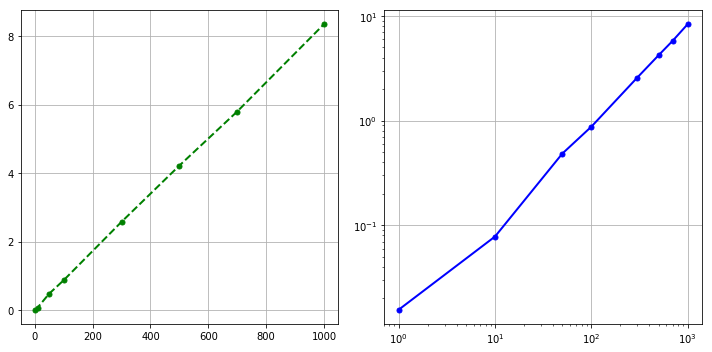

In [91]:
import matplotlib.pyplot as plt
%matplotlib inline

f, axs = plt.subplots(1,2, figsize=(10, 5))
axs[0].plot(times, results, color='green', marker='o', markersize=5, linestyle='dashed', linewidth=2)
axs[0].grid()

axs[1].loglog(times, results, color='blue', marker='o', markersize=5, linewidth=2)
axs[1].grid()

plt.tight_layout()
plt.savefig('sudoku.png', dpi = 72, transparent = True, bbox_inches='tight', pad_inches=0.5)